In [ ]:
# python tracking/train.py --script exot_st1 --config baseline_robot --save_dir . --mode single
# python tracking/train.py --script exot_st2 --config baseline_robot --save_dir . --mode single --script_prv exot_st1 --config_prv baseline_robot
from lib.utils.box_ops import giou_loss
from torch.nn.functional import l1_loss
from torch.nn import BCEWithLogitsLoss
# train pipeline related
from lib.train.trainers import LTRTrainer
from lib.train.base_functions import *

from lib.models.exot import build_exotst

# forward propagation related
from lib.train.actors import EXOTActor, EXOTSTActor
import importlib

https://fredriccliver.medium.com/cant-not-see-axis-label-of-jupyter-notebook-in-the-dark-theme-vscode-df31a3ee121

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
# from lib.pylight import LitEXOTActor, LitEXOTSTActor, LitODINActor, RobotDataModule
# from lib.models.exot import build_exotst_odin
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
from lib.test.evaluation import get_dataset
from lib.test.tracker.exotst_tracker import EXOTSTTracker
from collections import OrderedDict
import time
from lib.utils.lmdb_utils import decode_img
import argparse
import importlib
import cv2 as cv
from pl_prac import Settings
import tqdm

from cal_eps import parse_args_jup, test_tracker

epsilon = 0.005
args = ["exot_st", "baseline_mix", "--dataset", "robot_test", "--threads", "0", "--num_gpus", "1"]
args = parse_args_jup(args)

import multiprocessing
multiprocessing.set_start_method('spawn', force=True)
num_gpu = args.num_gpus
try:
    worker_name = multiprocessing.current_process().name
    worker_id = int(worker_name[worker_name.find('-') + 1:]) - 1
    gpu_id = worker_id % num_gpu
    #torch.cuda.set_device(gpu_id)
except:
    pass

vispred, visconf, exit_gt, objconf, results, objlabel_gt, objlabel_pred, objpred = \
    test_tracker(args.dataset_name, "exotst_testparam", args.tracker_param, epsilon)

import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
# plt.plot(vispred)
# plt.plot(visconf)
# plt.plot(exit_gt)
# plt.plot(objconf)
print(results)
# plt.plot(objlabel_gt)
# plt.plot(objlabel_pred)

/home/ella/projects/mfmot/STARK/data/robot-data
31
test config:  {'MODEL': {'HEAD_TYPE': 'CORNER', 'NLAYER_HEAD': 3, 'HEAD_ABS': False, 'HIDDEN_DIM': 256, 'NUM_OBJECT_QUERIES': 1, 'POSITION_EMBEDDING': 'sine', 'PREDICT_MASK': False, 'LOSS_TYPE': 'None', 'BACKBONE': {'TYPE': 'resnet50', 'OUTPUT_LAYERS': ['layer3'], 'STRIDE': 16, 'DILATION': False}, 'TRANSFORMER': {'NHEADS': 8, 'DROPOUT': 0.1, 'DIM_FEEDFORWARD': 2048, 'ENC_LAYERS': 6, 'DEC_LAYERS': 6, 'PRE_NORM': False, 'DIVIDE_NORM': False}}, 'TRAIN': {'TRAIN_CLS': True, 'LR': 0.0001, 'WEIGHT_DECAY': 0.0001, 'EPOCH': 50, 'LR_DROP_EPOCH': 40, 'BATCH_SIZE': 16, 'NUM_WORKER': 8, 'OPTIMIZER': ['ADAMW', 'SGD'], 'BACKBONE_MULTIPLIER': 0.1, 'REID_WEIGHT': 3.0, 'EXIT_WEIGHT': 3.0, 'GIOU_WEIGHT': 2.0, 'L1_WEIGHT': 5.0, 'CLS_WEIGHT': 1.0, 'OBJCLS_WEIGHT': 0.2, 'DEEP_SUPERVISION': False, 'FREEZE_BACKBONE_BN': True, 'FREEZE_LAYERS': ['conv1', 'layer1'], 'PRINT_INTERVAL': 10, 'VAL_EPOCH_INTERVAL': 10, 'GRAD_CLIP_NORM': 0.1, 'SCHEDULER': {'TYPE': 'st

[W accumulate_grad.h:185] Warning: grad and param do not obey the gradient layout contract. This is not an error, but may impair performance.
grad.sizes() = [256, 1024, 1, 1], strides() = [1024, 1, 1, 1]
param.sizes() = [256, 1024, 1, 1], strides() = [1024, 1, 1024, 1024] (function operator())


NEGATIVE NUM  144.0
NEGATIVE INDEX  (array([ 979,  980,  981,  982,  983,  984,  985,  986,  987,  988,  989,
        990,  991,  992,  993,  994,  995,  996,  997,  998,  999, 1000,
       1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011,
       1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022,
       1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088,
       1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110,
       1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121,
       1122]),

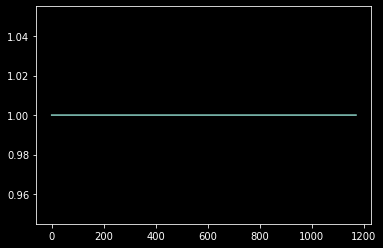

In [2]:
plt.plot(vispred)


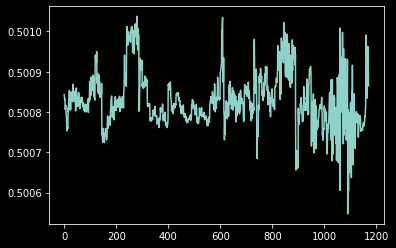

In [3]:
plt.plot(visconf)


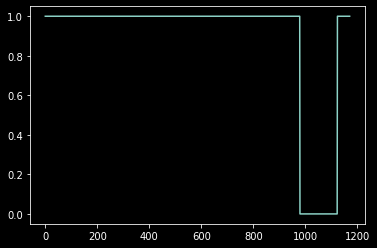

In [4]:
plt.plot(exit_gt)


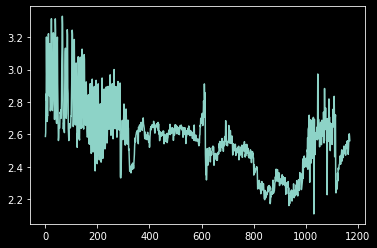

In [5]:
plt.plot(objconf)
#print(results)


357


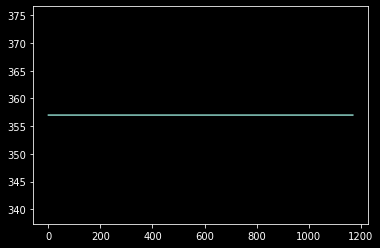

In [9]:
plt.plot(objlabel_gt)
print(objlabel_gt[0])

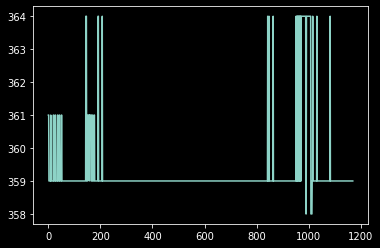

In [7]:
plt.plot(objlabel_pred)

(array([ 816,  817,  818,  824,  827,  828,  829,  830,  831,  833,  834,
        835,  837,  839,  840,  841,  842,  843,  844,  845,  846,  847,
        848,  849,  850,  851,  852,  853,  854,  855,  856,  858,  862,
        863,  864,  865,  866,  867,  868,  869,  870,  871,  872,  873,
        874,  876,  877,  878,  879,  880,  881,  924,  925,  931,  934,
        935,  936,  937,  938,  939,  940,  941,  942,  943,  944,  945,
        946,  947,  948,  949,  950,  951,  952,  953,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  965,  967,  968,  969,  970,
        972,  976,  984,  985, 1032, 1083, 1116, 1117, 1120, 1121, 1122]),)


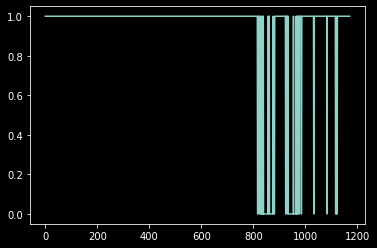

In [10]:
plt.plot(objpred)
print(np.nonzero(objpred==0))

979,  980,  981,  982,  983,  984,  985,  986,  987,  988,  989,
        990,  991,  992,  993,  994,  995,  996,  997,  998,  999, 1000,
       1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011,
       1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022,
       1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088,
       1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110,
       1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121,
       1122

In [ ]:
import torch
from pl_prac import Settings
checkpoint = torch.load(f"checkpoints/train/exot_st2/baseline_mix_fold_0/EXOTST_epepoch=0.pth.tar", map_location='cpu')

In [ ]:
checkpoint['net'].keys()

In [ ]:
from lib.models.exot import build_exotst
from pl_prac import *
import torch
from pl_prac import Settings
args = parse_args_jup(['--script', 'exot_st2', '--config', 'baseline_mix', '--save_dir', '.', '--mode', 'single', '--script_prv', 'exot_st1', '--config_prv', 'baseline_mix'])
settings = Settings()
cfg = settings.set_args(args)
net = build_exotst(cfg)  

In [ ]:
net

In [ ]:
import torch
newone = torch.nn.Sequential(net.backbone, 
net.transformer,
net.box_head,
net.query_embed,
net.bottleneck,
net.cls_head,
net.objcls_head.layers,
net.objcls_head.h)

new_model = torch.nn.Sequential(*(list(net.children())[:-1]))
new_model

In [ ]:
newone

In [ ]:
loss = torch.nn.CrossEntropyLoss(reduction='none')
loss2 = torch.nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output2 = loss2(input, target)
a = torch.tensor([0,1,0])
print(input, target, output, output*(1-a))
print(output2, torch.mean(output))

https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
# from lib.pylight import LitEXOTActor, LitEXOTSTActor, LitODINActor, RobotDataModule
# from lib.models.exot import build_exotst_odin

from lib.test.evaluation import get_dataset
from lib.test.tracker.exotst_tracker import EXOTSTTracker
from collections import OrderedDict
import time
from lib.utils.lmdb_utils import decode_img
import argparse
import importlib
import cv2 as cv
from pl_prac import Settings


epsilon_grid = [0.0025, 0.005, 0.01, 0.02, 0.04, 0.08]
mean_scores = {}

def parse_args(args):
    parser = argparse.ArgumentParser(description='Run tracker on sequence or dataset.')
    parser.add_argument('tracker_name', type=str, help='Name of tracking method.')
    parser.add_argument('tracker_param', type=str, help='Name of config file.')
    parser.add_argument('--runid', type=int, default=None, help='The run id.')
    parser.add_argument('--dataset_name', type=str, default='otb', help='Name of dataset (otb, nfs, uav, tpl, vot, tn, gott, gotv, lasot).')
    parser.add_argument('--sequence', type=str, default=None, help='Sequence number or name.')
    parser.add_argument('--debug', type=int, default=0, help='Debug level.')
    parser.add_argument('--threads', type=int, default=0, help='Number of threads.')
    parser.add_argument('--num_gpus', type=int, default=2)

    args = parser.parse_args(args)
    return args

def run_tracker(dataset_name, name, parameter_name, epsilon):
    dataset = get_dataset(dataset_name)
    print(len(dataset))
    for seq in dataset:
        print(seq)
        params = get_parameters(name, parameter_name)
        # print("PARAMSS", params)

        # Get init information
        init_info = seq.init_info()

        tracker = EXOTSTTracker(params, dataset_name)

        output = {'target_bbox': [],
                  'time': []}
        if tracker.params.save_all_boxes:
            output['all_boxes'] = []
            output['all_scores'] = []

        # Initialize
        image = _read_image(seq.frames[0])

        start_time = time.time()
        out = tracker.initialize(image, init_info)
        if out is None:
            out = {}

        prev_output = OrderedDict(out)
        init_default = {'target_bbox': init_info.get('init_bbox'),
                        'time': time.time() - start_time}
        if tracker.params.save_all_boxes:
            init_default['all_boxes'] = out['all_boxes']
            init_default['all_scores'] = out['all_scores']

        _store_outputs(out, output, init_default)

        for frame_num, frame_path in enumerate(seq.frames[1:], start=1):
            image = _read_image(frame_path)

            start_time = time.time()

            info = seq.frame_info(frame_num)
            info['previous_output'] = prev_output

            out = tracker.odin_track(image, epsilon, info)
            prev_output = OrderedDict(out)
            _store_outputs(out, output, {'time': time.time() - start_time})
        
        for key in ['target_bbox', 'all_boxes', 'all_scores']:
            if key in output and len(output[key]) <= 1:
                output.pop(key)

def _store_outputs(tracker_out: dict, output, defaults=None):
    defaults = {} if defaults is None else defaults
    for key in output.keys():
        val = tracker_out.get(key, defaults.get(key, None))
        if key in tracker_out or val is not None:
            output[key].append(val)


def _read_image(image_file: str):
    if isinstance(image_file, str):
        im = cv.imread(image_file)
        return cv.cvtColor(im, cv.COLOR_BGR2RGB)
    elif isinstance(image_file, list) and len(image_file) == 2:
        return decode_img(image_file[0], image_file[1])
    else:
        raise ValueError("type of image_file should be str or list")

def get_parameters(name, parameter_name):
    """Get parameters."""
    param_module = importlib.import_module('lib.test.parameter.{}'.format(name))
    params = param_module.parameters(parameter_name)
    return params


args = parse_args(["exot_st", "baseline_mix", "--dataset", "robot_test", "--threads", "0", "--num_gpus", "1"])

import multiprocessing
multiprocessing.set_start_method('spawn', force=True)
num_gpu = args.num_gpus
try:
    worker_name = multiprocessing.current_process().name
    worker_id = int(worker_name[worker_name.find('-') + 1:]) - 1
    gpu_id = worker_id % num_gpu
    #torch.cuda.set_device(gpu_id)
except:
    pass

for epsilon in epsilon_grid:
    mean_scores[epsilon] = run_tracker(args.dataset_name, "exotst_testparam", args.tracker_param, epsilon)

best_epsilon = min(mean_scores, key=(lambda key: mean_scores[key]))
print(f"Epsilon: {best_epsilon / 2.}")

In [ ]:
torch.random.set_seed(42)
np.random.seed(42)
checkpoint = torch.load("checkpoints/train/exot_st2/baseline_mix_fold_0_5/EXOTST_epoch=30.pth.tar", map_location='cpu')
net = build_exotst_odin(cfg) 
net.load_state_dict(checkpoint['net'], strict=False)
net.eval()



model = LitODINActor(cfg, settings, loss_type=cfg.MODEL.LOSS_TYPE, objective=objective, loss_weight = loss_weight, lr=cfg.TRAIN.LR) 
# checkpoint = torch.load(f"checkpoints/train/exot_st1/baseline_mix_fold{k}/EXOTST_epepoch=0.pth.tar", map_location='cpu')
model = LitODINActor.load_from_checkpoint(f"checkpoints/train/{args.script_prv}/{args.config_prv}_fold_0/EXOTST_epepoch=23.pth.tar", strict=False)
model.re_load(cfg, settings, loss_type=cfg.MODEL.LOSS_TYPE, objective=objective, loss_weight = loss_weight, lr=cfg.TRAIN.LR)

robot_data = RobotDataModule(data_dir='data/robot-data/', batch_size=cfg.TRAIN.BATCH_SIZE, kfoldness = False, test_size=0.4)
robot_data.fill_state(cfg, settings)

BATCH_SIZE = 128
SAMPLES_PERTURB = 1000

# perturb_samples = x_test[:SAMPLES_PERTURB].astype("float32")
# perturb_ds = tf.data.Dataset.from_tensor_slices(perturb_samples).batch(BATCH_SIZE)

# scorer = tf.keras.Model(model.input, model.layers[-3].output)
# Grid as defined in Section 3.2.
epsilon_grid = [0.0025, 0.005, 0.01, 0.02, 0.04, 0.08]

def perturb_images(model, epsilon):
    batch_wise_means = []
    
    for images in perturb_ds:
        test_ds_var = tf.Variable(images, trainable=True)
        
        with tf.GradientTape() as tape:
            # Calculate the scores.
            tape.watch(test_ds_var)
            logits = model(test_ds_var, training=False)
            loss = torch.amax(logits, axis=1)
            loss = -torch.mean(loss)

        # Calculate the gradients of the scores with respect to the inputs.
        gradients = tape.gradient(loss, test_ds_var)
        gradients = torch.ge(gradients, 0)
        gradients = gradients.to(torch.float32)
        gradients = (gradients - 0.5) * 2

        # Perturb the inputs and derive new mean score.
        # test_ds_var.assign_add(epsilon * gradients)
        static_tensor = torch.as_tensor(test_ds_var)
        static_tensor = static_tensor - epsilon * gradients
        static_tensor = torch.clamp(static_tensor, 0., 255.)
        
        new_scores = model.predict(static_tensor)
        new_scores = -torch.amax(new_scores, dim=1)
        new_mean_score = torch.mean(new_scores).numpy()
        batch_wise_means.append(new_mean_score)
    
    return batch_wise_means

mean_scores = {}

for epsilon in epsilon_grid:
    mean_scores[epsilon] = np.mean(perturb_images(scorer, epsilon))

best_epsilon = min(mean_scores, key=(lambda key: mean_scores[key]))
print(f"Epsilon: {best_epsilon / 2.}")

https://discuss.pytorch.org/t/batch-normalization-disambiguation/42391

https://stackoverflow.com/questions/64856195/what-is-tape-based-autograd-in-pytorch

https://pytorch-lightning.readthedocs.io/en/stable/extensions/loops.html

https://docs.wandb.ai/ref/app/features/panels/line-plot

In [ ]:
import torch
N, C, H, W = 10, 1, 24, 24
x = torch.randn(N, C, H, W)

bn2d = torch.nn.BatchNorm2d(1)
bn1d = torch.nn.BatchNorm1d(1)
ln = torch.nn.Linear(24,12)

with torch.no_grad():
    bn2d.weight = bn1d.weight
    bn2d.bias = bn1d.bias

# out = ln(x)
# print(out.shape)
print(x)
output2d = bn2d(x)
output1d = bn1d(x.view(N, C, -1))
print(output2d)
print(output1d)
print((output2d.view(N, C, -1) == output1d).all())
# > tensor(1, dtype=torch.uint8)

In [ ]:
config_module = importlib.import_module("lib.config.%s.config" % settings.script_name)
cfg = config_module.cfg
config_module.update_config_from_file(settings.cfg_file)
update_settings(settings, cfg)

loader_train, loader_val = build_dataloaders(cfg, settings)

net = build_exotst(cfg)

In [ ]:
objective = {'giou': giou_loss, 'l1': l1_loss, 'joint': l1_loss, 'reId': l1_loss, 'exit_top': BCEWithLogitsLoss(), 'exit_bottom': l1_loss}

loss_weight = {'giou': cfg.TRAIN.GIOU_WEIGHT, 'l1': cfg.TRAIN.L1_WEIGHT, 'reId': cfg.TRAIN.REID_WEIGHT, 'exit': cfg.TRAIN.EXIT_WEIGHT}

# loss_weight = {'giou': cfg.TRAIN.GIOU_WEIGHT, 'l1': cfg.TRAIN.L1_WEIGHT}
actor = EXOTActor(net=net, objective=objective, loss_weight=loss_weight, settings=settings, loss_type=cfg.MODEL.LOSS_TYPE)


In [ ]:
# Optimizer, parameters, and learning rates
optimizer, lr_scheduler = get_optimizer_scheduler(net, cfg)
use_amp = getattr(cfg.TRAIN, "AMP", False)
trainer = LTRTrainer(actor, [loader_train, loader_val], optimizer, settings, lr_scheduler, use_amp=use_amp)

trainer.train(cfg.TRAIN.EPOCH, load_latest=True, fail_safe=True)
